In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset=pd.read_csv('desktop/deeplearning/chap3/data/iris.data', names=names)

In [22]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [25]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test,y_pred)))

정확도: 0.8333333333333334


In [27]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1,k+1,1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도",max_acc,"으로 최적의 k는",k+1,"입니다.")

정확도 1.0 으로 최적의 k는 3 입니다.


In [2]:
%matplotlib inline
from sklearn.datasets import load_digits
digits=load_digits()
print("Image Data Shape",digits.data.shape)
print("Label Data Shape",digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


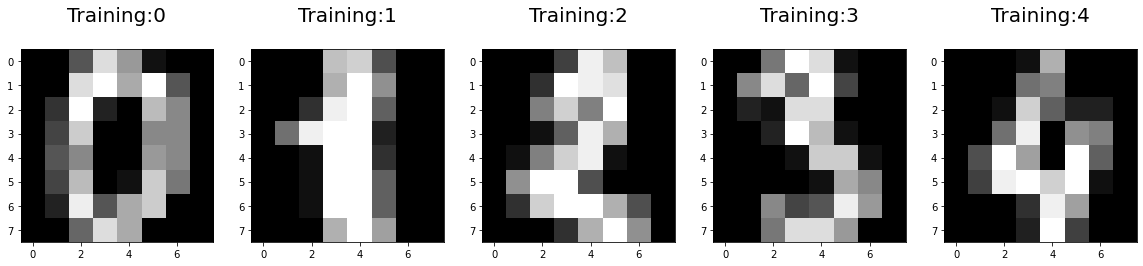

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training:%i\n'%label,fontsize=20)

In [7]:
import numpy as np
import seaborn as sns
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt=".3f",linewidths=.5,square=True,cmap='Blue_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15);
plt.show();

NameError: name 'y_test' is not defined

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [11]:
dataset=pd.read_csv('desktop/deeplearning/chap3/data/weather.csv')

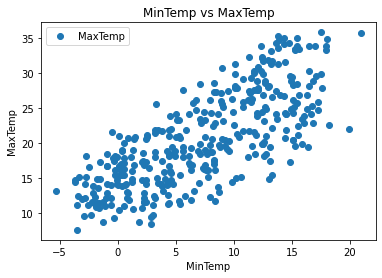

In [12]:
dataset.plot(x='MinTemp',y='MaxTemp',style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [14]:
X=dataset['MinTemp'].values.reshape(-1,1)
y=dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=regressor.predict(X_test)
df=pd.DataFrame({'Actual':y_test.flatten(),'Predict':y_pred.flatten()})
df

,Actual,Predict
0,14.3,17.305258
1,25.2,23.509739
2,21.0,25.209597
3,16.7,13.565571
4,23.3,18.835130
...,...,...
69,27.4,22.404831
70,31.6,26.569483
71,23.4,20.365002
72,18.0,23.849710


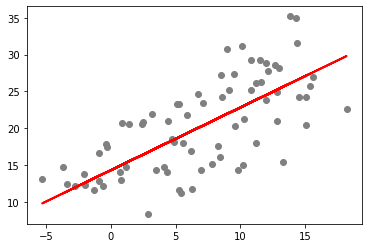

In [19]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [34]:
data=pd.read_csv('desktop/deeplearning/chap3/data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [35]:
categorical_features=['Channel','Region']
conticuous_features=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for col in categorical_features:
    dummies=pd.get_dummies(data[col],prefix=col)
    data=pd.concat([data,dummies],axis=1)
    data.drop(col,axis=1,inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [38]:
mms=MinMaxScaler()
mms.fit(data)
data_transformed=mms.transform(data)

Sum_of_squared_distances=[]
K=range(1,15)
for k in K:
    km=KMeans(n_clusters=k)
    km=km.fit(data_transformed)
    Sum_of_Squared_distances.append(km.inertia_)
    
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optical k')
plt.show()

NameError: name 'Sum_of_Squared_distances' is not defined

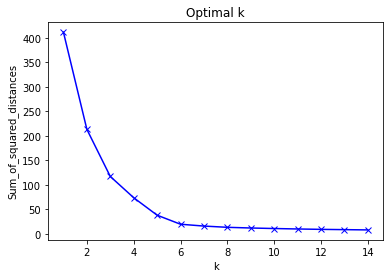

In [40]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [13]:
X=pd.read_csv('desktop/deeplearning/chap3/data/credit card.csv')
X=X.drop('CUST_ID',axis=1)
X.fillna(method='ffill',inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

In [14]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_normalized=normalize(X_scaled)
X_normalized=pd.DataFrame(X_normalized)

pca=PCA(n_components=2)
X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)
X_principal.columns=['P1','P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544829
2  0.330634  0.268887
3 -0.481657 -0.097614
4 -0.563512 -0.482506


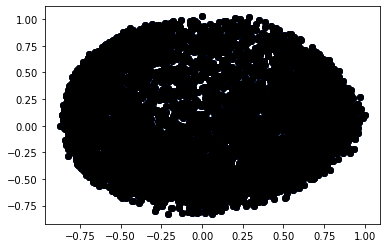

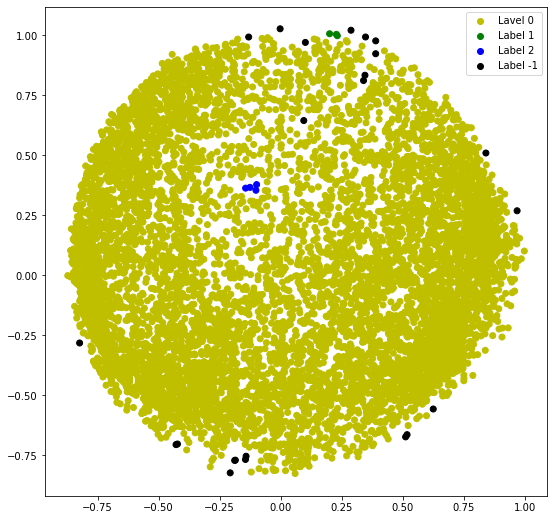

In [16]:
db_default=DBSCAN(eps=0.0375,min_samples=3).fit(X_principal)
labels=db_default.labels_

colours={}
colours[0]='y'
colours[1]='g'
colours[2]='b'
colours[-1]='k'

cvec=[colours[label] for label in labels]

r=plt.scatter(X_principal['P1'],X_principal['P2'],color='y');
g=plt.scatter(X_principal['P1'],X_principal['P2'],color='g');
b=plt.scatter(X_principal['P1'],X_principal['P2'],color='b');
k=plt.scatter(X_principal['P1'],X_principal['P2'],color='k');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'],X_principal['P2'],c=cvec)

plt.legend((r,g,b,k),('Lavel 0','Label 1','Label 2','Label -1'))
plt.show()